# Sentiment Analysis in Python
Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.



# Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Train.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# About Data                         
After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

In [37]:
data.shape

(50000, 2)

In [3]:
data = data.iloc[:10000,:]

In [39]:
data.shape

(10000, 2)

# Working With Label

In [4]:
data['sentiment'].value_counts()

sentiment
1    5028
0    4972
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

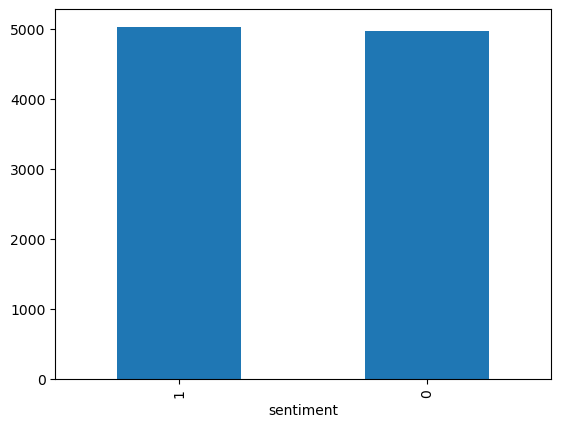

In [5]:
data['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

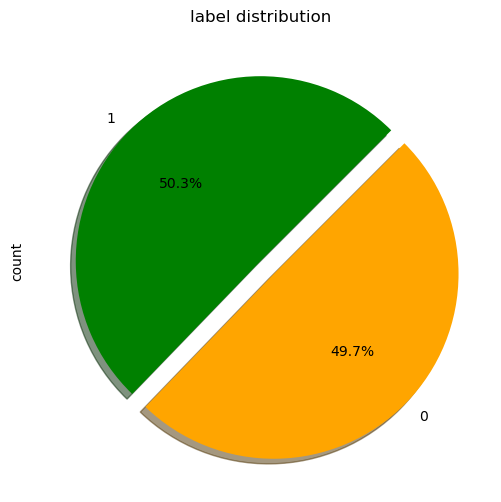

In [6]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

# Working With Text

In [7]:
data['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

In [8]:
!pip install nltk

# Cleaning  steps                                       
removing HTML Tags                                        
extracting emojies    # The pattern re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)') is a regular expression                                                   used to match and extract emojis from a given text.                                                
removing special chars,puntuation,sumbols                                                 
lower casing    
removing stopwords                                
tokenization

In [9]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [10]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)


In [11]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [12]:
data['review'] = data['review'].apply(lambda x: preprocessing(x))

In [13]:
data['review']

0       one review mention watch 1 oz episod hook righ...
1       wonder littl product film techniqu unassum old...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy jake think zombi closet...
4       petter mattei love time money visual stun film...
                              ...                        
9995    fun entertain movi wwii german spi juli andrew...
9996    give break anyon say good hockey movi know mov...
9997    movi bad movi watch endless seri bad horror mo...
9998    movi probabl made entertain middl school earli...
9999    smash film film make show intens strang relati...
Name: review, Length: 10000, dtype: object

# Visualizing Negative and Positive Words

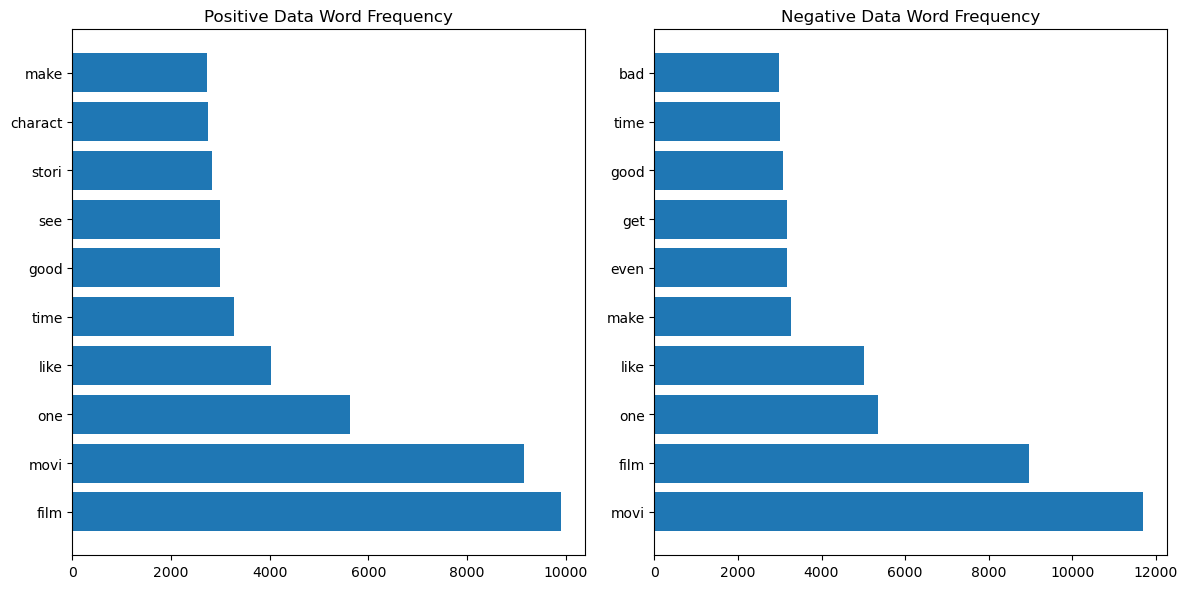

In [15]:
positivedata = data[data['sentiment'] == '1']
positivedata = positivedata['review']
negdata = data[data['sentiment'] == '0']
negdata = negdata['review']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


# TF-IDF Vertorizer to convert the raw documents into feature matrix 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.review)

# Training Machine Learning Model for Sentiment Analysis
Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, verbose=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


# Accuracy

In [22]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8342


# Pickle files

In [24]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

# prediction

In [23]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


In [25]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

negative comment


In [27]:
data['review'][9995]

'fun entertain movi wwii german spi juli andrew fall love american pilot rock hudson tri get secret reason attack critic shun public 1970 see beauti shot wonder costum interior excit aerial dogfight also andrew strip teas strictli pg materi sing beauti song whistl dark movi problem andrew hudson get along shoot show love scene lack spark zero sexual chemistri still turn ok perform film littl long even 105 min director cut saw get way dark seriou end still worth catch tri see director cut one run half hour longer'

In [49]:
data['revie'][0]

'grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment'